### Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from src.modules.fruitsDataProcessor import (load_data,display_data,decode)

### Load Fruits Data

In [5]:
(X_train,y_train),(X_test,y_test) = load_data(150)

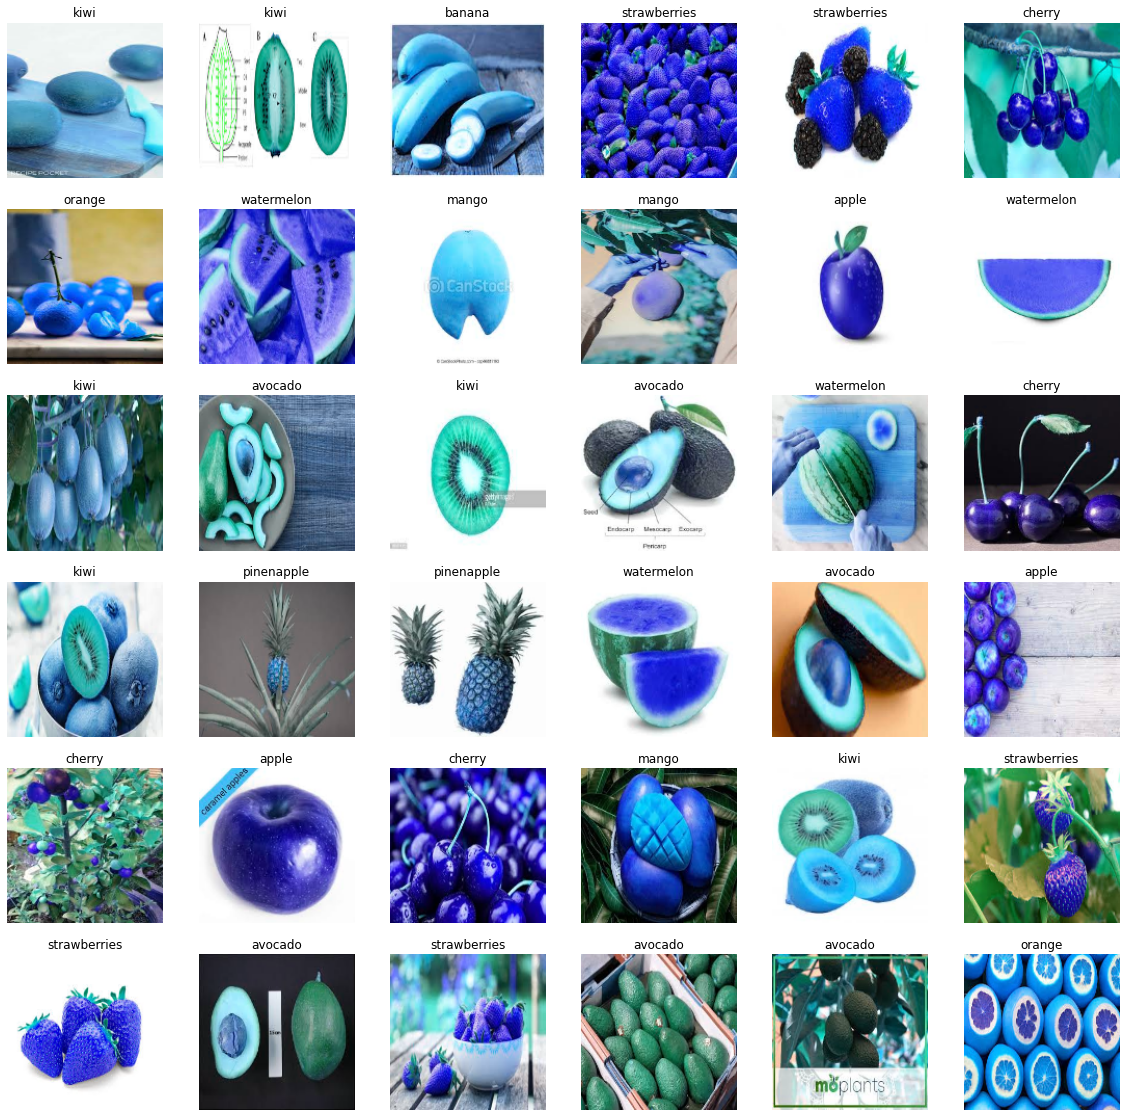

In [6]:
display_data(X_train,y_train)

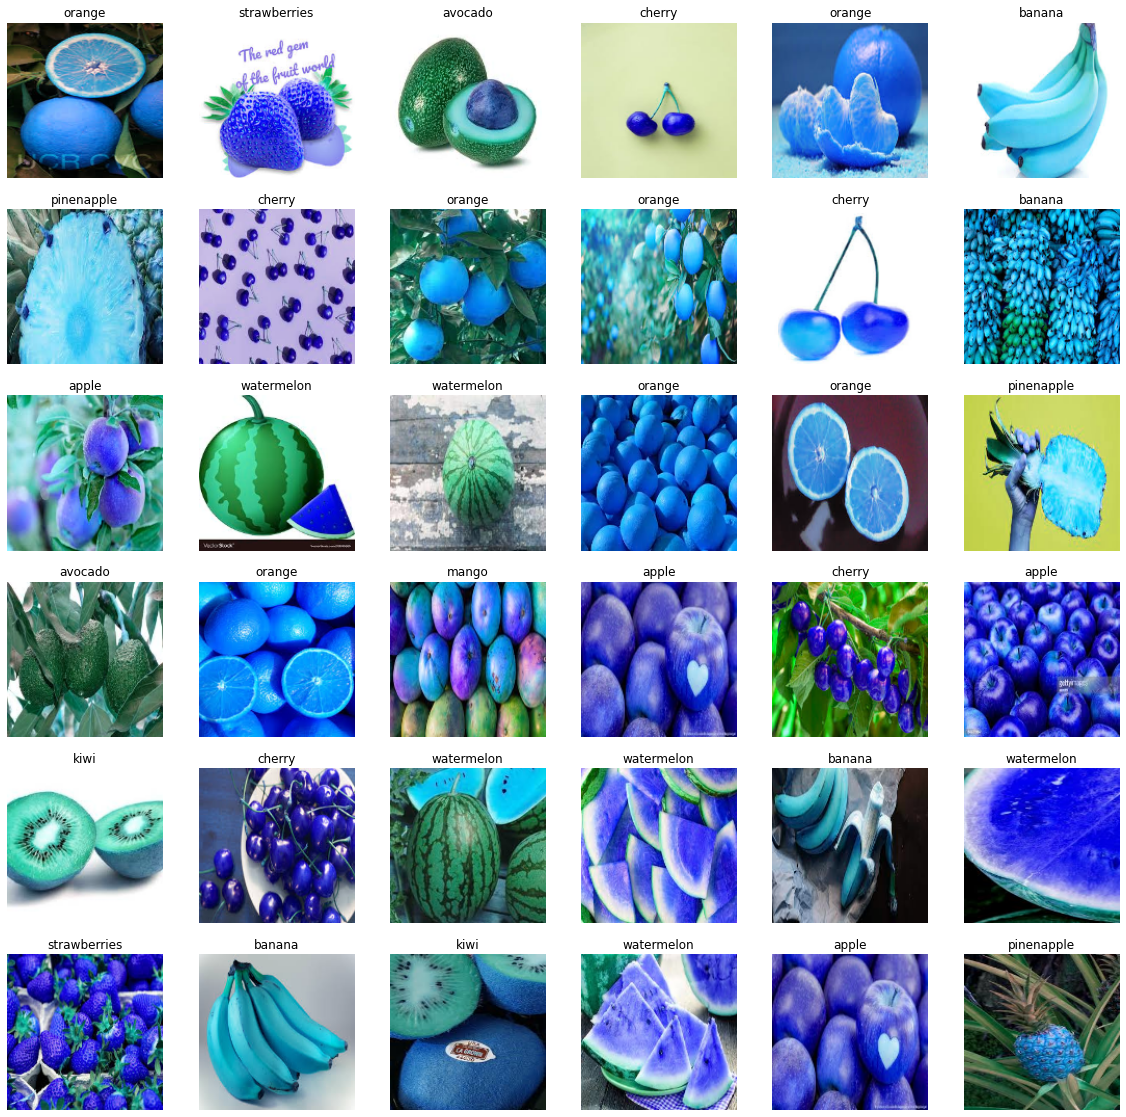

In [7]:
display_data(X_test,y_test)

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test= np.array(X_test)
y_test = np.array(y_test)

In [9]:
X_train.shape

(2300, 150, 150, 3)

In [10]:
X_test.shape

(1025, 150, 150, 3)

In [9]:
np.save('./data/generated/X_train.npy',X_train)
np.save('./data/generated/y_train.npy',y_train)

np.save('./data/generated/X_test.npy',X_test)
np.save('./data/generated/y_test.npy',y_test)

### Build CNN Model

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=192,kernel_size=(5,5),activation="relu",input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=132,kernel_size=(5,5),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=124,kernel_size=(7,7),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=116,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=80,kernel_size=(2,2),activation="relu"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(100 , activation="relu"))

model.add(tf.keras.layers.Dense(10 , activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 192)     14592     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 192)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 132)       633732    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 132)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 124)       802156    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 124)      0

In [13]:
model.compile(
    
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 192)     14592     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 192)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 132)       633732    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 132)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 124)       802156    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 124)      0

### Train the Model

In [ ]:
model.fit(X_train,y_train,epochs=36,batch_size=64)

Epoch 1/32

36/36 [==============================] - 9s 225ms/step - loss: 5.3044 - accuracy: 0.1365

Epoch 2/32

36/36 [==============================] - 8s 224ms/step - loss: 1.9356 - accuracy: 0.2104

Epoch 3/32

36/36 [==============================] - 8s 223ms/step - loss: 1.7248 - accuracy: 0.2965

Epoch 4/32

36/36 [==============================] - 8s 223ms/step - loss: 1.6214 - accuracy: 0.3391

Epoch 5/32

36/36 [==============================] - 8s 224ms/step - loss: 1.5587 - accuracy: 0.3765

Epoch 6/32

36/36 [==============================] - 8s 225ms/step - loss: 1.5052 - accuracy: 0.4017

Epoch 7/32

36/36 [==============================] - 8s 226ms/step - loss: 1.4790 - accuracy: 0.4209

Epoch 8/32

36/36 [==============================] - 8s 228ms/step - loss: 1.4896 - accuracy: 0.4296

Epoch 9/32

36/36 [==============================] - 8s 229ms/step - loss: 1.3668 - accuracy: 0.4713

Epoch 10/32

36/36 [==============================] - 8s 229ms/step - loss: 1.3044 - accuracy: 0.5187

Epoch 11/32

36/36 [==============================] - 8s 230ms/step - loss: 1.2612 - accuracy: 0.5330

Epoch 12/32

36/36 [==============================] - 8s 230ms/step - loss: 1.1554 - accuracy: 0.5713

Epoch 13/32

36/36 [==============================] - 8s 230ms/step - loss: 1.1291 - accuracy: 0.5817

Epoch 14/32

36/36 [==============================] - 8s 231ms/step - loss: 1.0889 - accuracy: 0.6026

Epoch 15/32

36/36 [==============================] - 8s 231ms/step - loss: 0.9325 - accuracy: 0.6648

Epoch 16/32

36/36 [==============================] - 8s 232ms/step - loss: 0.7738 - accuracy: 0.7161

Epoch 17/32

36/36 [==============================] - 8s 232ms/step - loss: 0.6910 - accuracy: 0.7478

Epoch 18/32

36/36 [==============================] - 8s 233ms/step - loss: 0.6339 - accuracy: 0.7622

Epoch 19/32

36/36 [==============================] - 8s 233ms/step - loss: 0.6669 - accuracy: 0.7643

Epoch 20/32

36/36 [==============================] - 8s 232ms/step - loss: 0.5292 - accuracy: 0.8204

Epoch 21/32

36/36 [==============================] - 8s 232ms/step - loss: 0.4470 - accuracy: 0.8487

Epoch 22/32

36/36 [==============================] - 8s 232ms/step - loss: 0.3881 - accuracy: 0.8713

Epoch 23/32

36/36 [==============================] - 8s 232ms/step - loss: 0.4202 - accuracy: 0.8591

Epoch 24/32

36/36 [==============================] - 8s 232ms/step - loss: 0.2826 - accuracy: 0.9013

Epoch 25/32

36/36 [==============================] - 8s 231ms/step - loss: 0.2249 - accuracy: 0.9265

Epoch 26/32

36/36 [==============================] - 8s 231ms/step - loss: 0.3416 - accuracy: 0.8874

Epoch 27/32

36/36 [==============================] - 8s 231ms/step - loss: 0.4052 - accuracy: 0.8743

Epoch 28/32

36/36 [==============================] - 8s 231ms/step - loss: 0.3879 - accuracy: 0.8743

Epoch 29/32

36/36 [==============================] - 8s 230ms/step - loss: 0.1888 - accuracy: 0.9391

Epoch 30/32

36/36 [==============================] - 8s 232ms/step - loss: 0.1080 - accuracy: 0.9643

Epoch 31/32

36/36 [==============================] - 8s 232ms/step - loss: 0.0693 - accuracy: 0.9787

Epoch 32/32

36/36 [==============================] - 8s 233ms/step - loss: 0.1224 - accuracy: 0.9617

<keras.callbacks.History at 0x7f5e461ac790>

In [15]:
loaded_model = tf.keras.models.load_model("./src/saved")

### Test the Model

In [15]:
loaded_model.evaluate(X_test,y_test)

33/33 [==============================] - 42s 1s/step - loss: 3.1221 - accuracy: 0.5756


[3.122105836868286, 0.5756097435951233]

### Predict new examples

In [16]:
predictions = loaded_model.predict(X_test)

33/33 [==============================] - 41s 1s/step


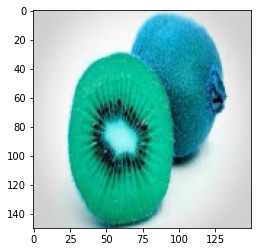

In [27]:
plt.imshow(X_test[498])

In [28]:
print(decode(np.argmax(predictions[498])))


kiwi
